<a href="https://colab.research.google.com/github/AjitaGiri/python_pandas/blob/deep-learning/ANN_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN implentation using tensorflow

Objective: Based on data, we try to predict whether the customer will exit bank or not.

Since this is a binary classification problem, so we are using:

*   Input Layer: independent features
*   Hidden Layer: linear step(z=w*x+b); RELU activation function
*   Output Layer: linear step (x=w*x+b) =>logit; apply sigmoid activation function


Binary cross entropy(Log Loss)
J(w,b)= -1/n summation(yi*log(y^)+(1-yi)*log(1-y^))

Minimize loss using Adam optimizer updating weight and bias





In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
#import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#divide the dataset into dependent and independent features

X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [ ]:
# Feature Engineering
geography=pd.get_dummies(X['Geography'],drop_first=True,dtype='int')
gender=pd.get_dummies(X['Gender'],drop_first=True,dtype='int')

In [ ]:
## concatenate these variables with dataset
X=X.drop(['Geography','Gender'],axis=1)

In [ ]:
X=pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [ ]:
#split dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0)


In [ ]:
 #feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)


keras is high-level API inside tensorflow that simplifies model building,training and evaluating neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# initialize ANN
classifier = Sequential()

In [ ]:
# Adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [ ]:
# add first hidden layer
classifier.add(Dense(units=7,activation='relu'))

In [ ]:
#add second hiddden layer
classifier.add(Dense(units=6,activation='relu'))

In [ ]:
#add output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [ ]:
#compile
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
#training the model
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.6544 - loss: 0.6149 - val_accuracy: 0.8099 - val_loss: 0.4507
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8253 - loss: 0.4235 - val_accuracy: 0.8175 - val_loss: 0.4340
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8123 - loss: 0.4276 - val_accuracy: 0.8198 - val_loss: 0.4215
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8286 - loss: 0.4049 - val_accuracy: 0.8251 - val_loss: 0.4090
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8410 - loss: 0.3873 - val_accuracy: 0.8319 - val_loss: 0.3947
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8500 - loss: 0.3660 - val_accuracy: 0.8391 - val_loss: 0.3817
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8469 - loss: 0.3701 - val_accuracy: 0.8421 - val_loss: 0.3741
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8577 - loss: 0.3480 - 

When I keep epoch=1000, at first accuracy increases and loss decreases but after some point it was constant till 1000,so I used early stopping.

Early stopping will stop the training of model automatically when there is no change in accuracy of model in consecutive iterations.

In [ ]:
#Early stopping
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [ ]:
model=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)


Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8772 - loss: 0.2896 - val_accuracy: 0.8398 - val_loss: 0.4160
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8801 - loss: 0.2864 - val_accuracy: 0.8413 - val_loss: 0.4155
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8849 - loss: 0.2872 - val_accuracy: 0.8364 - val_loss: 0.4144
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8801 - loss: 0.2929 - val_accuracy: 0.8402 - val_loss: 0.4131
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8846 - loss: 0.2798 - val_accuracy: 0.8353 - val_loss: 0.4119
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8792 - loss: 0.2850 - val_accuracy: 0.8421 - val_loss: 0.4125
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8732 - loss: 0.2982 - val_accuracy: 0.8387 - val_loss: 0.4171
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8850 - loss: 0.2863 - 

In [ ]:
model.history.keys()

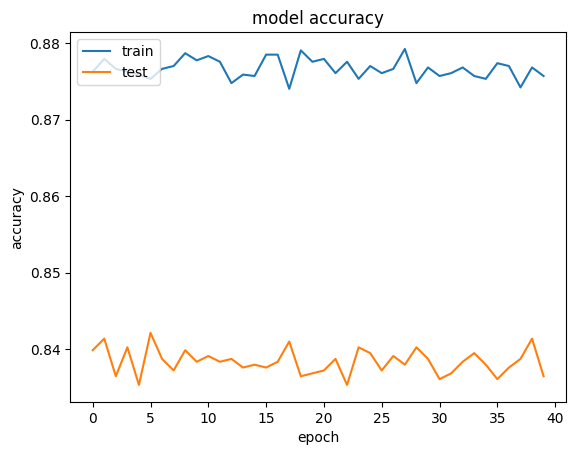

In [ ]:
#summarize history for accuracy
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

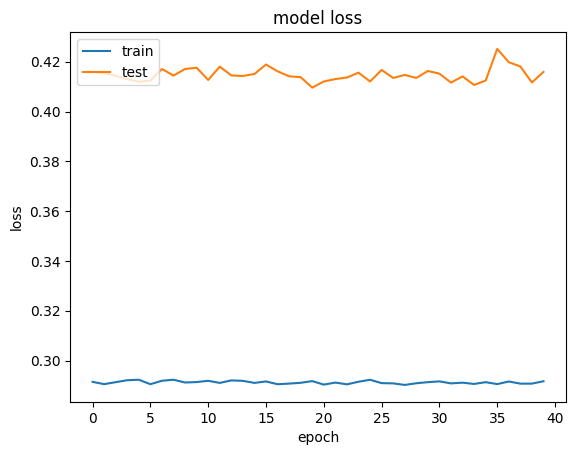

In [ ]:
#summarize history for loss
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
# making predictions and evaluating the performance of the model
y_pred=classifier.predict(X_test)
y_pred=(y_pred>=0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [ ]:
#make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1482,  113],
       [ 182,  223]])

In [ ]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [ ]:
score

0.8525

In [ ]:
#get the weights and bias
classifier.get_weights()

[array([[ 0.07890742, -0.30851585, -0.87426424, -1.1029153 , -0.13210596,
          0.28408596, -0.02029227, -0.52643955,  0.25722584,  0.5164375 ,
          0.16949733],
        [ 1.504688  , -0.5815625 ,  0.46951678,  1.5221095 ,  0.40707892,
          0.398092  ,  0.5754531 ,  0.67668813, -0.30319208, -1.2574596 ,
          1.5778011 ],
        [ 0.0055161 , -0.5670099 , -0.3467537 , -0.3339199 , -0.01711207,
          0.24172053, -0.6243669 , -0.09394126,  0.59885937, -0.83967584,
         -0.24210493],
        [ 0.42605734,  1.3593884 , -0.08653595, -0.8186491 , -1.2174742 ,
         -0.8309193 , -0.5974268 , -0.07880435, -1.331813  , -0.335117  ,
          1.2346747 ],
        [ 1.9987079 , -0.9877284 ,  0.8408245 , -0.39448982, -1.5760838 ,
         -0.914764  , -1.5940975 ,  0.04373255,  0.70230055, -0.6148952 ,
         -0.59936315],
        [-0.5180487 ,  0.53169256,  1.1393231 , -0.00877362,  0.02834042,
          0.0443355 , -0.15767343, -1.0158029 , -1.2327948 ,  0.5907864